# World Happiness Report Data Cleaning and Analysis with Aggregation

In this project I will work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10. Data analysis will focus on answering questions such as:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?



In [3]:
import pandas as pd
import numpy as np
# read the World_Happiness_2015.csv file into a dataframe
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
print(happiness2015.info())
first_5 = happiness2015.iloc[:5,:]
print(first_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2   

In [4]:
# Let's visualize happiness for a region and see how the data looks for south asia
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='bar', title='Southern Asia Happiness Scores', xlim=(0,10))

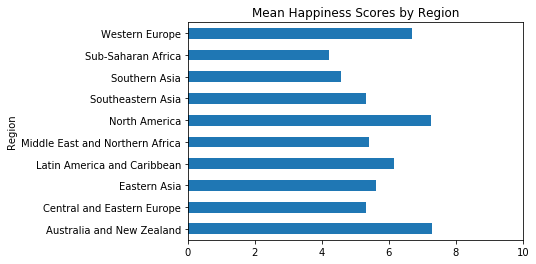

In [5]:
# reate a visualization that uses a summary statistic (mean value) to summarize the data for each region
agg_region_2015 = (happiness2015.groupby(["Region"]).mean()).reset_index()
agg_region_2015.plot(x='Region', y='Happiness Score', kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

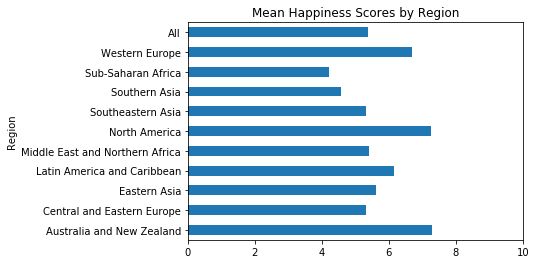

In [6]:
# we can use the df.pivot_table() method to more intuitively perform the same aggregation as above.
# As a user of MS Excel, this is also easier to comprehend
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

Note the difference above with the inclusion of the statistics for "All". When the margins parameter is set to be equal to True, All will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column. This is very helpful during analysis and I prefer that. This method also allows us to aggregate multiple columns and apply multiple functions at once.

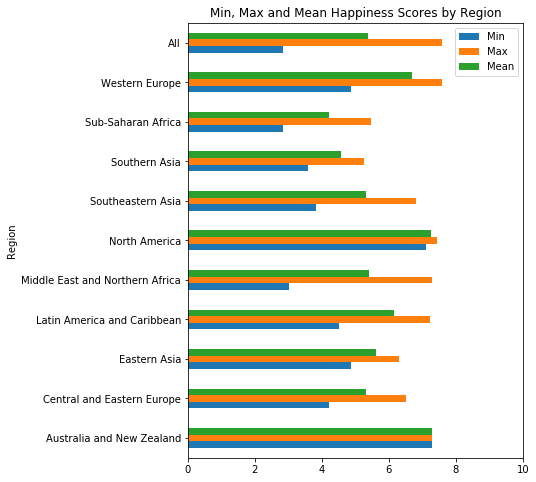

In [7]:
# calculate the the minimum, maximum, and mean for the entire Happiness Score column
pv_happy_family_stats = happiness2015.pivot_table(values=["Happiness Score"], index="Region", aggfunc=[np.min, np.max, np.mean], margins=True)
ax = pv_happy_family_stats.plot.barh(figsize=(6,8), title="Min, Max and Mean Happiness Scores by Region", xlim=(0,10))
ax.legend(["Min", "Max", "Mean"])


# Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

Let's analyze the 2015, 2016, and 2017 reports and look for trends to help answer this and other questions by reading the 2015, 2016, and 2017 reports into a pandas dataframe and adding a Year column to each to make it easier to distinguish between them

In [8]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
# Add a column called Year to each dataframe with the corresponding year
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017
print(happiness2017.head(3))

   Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   
2  Iceland               3            7.504      7.622030     7.385970   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  Year  
0    0.362012                       0.315964           2.277027  2017  
1    0.355280                       0.400770           2.313707  2017  
2    0.475540                       0.153527           2.322715  2017  


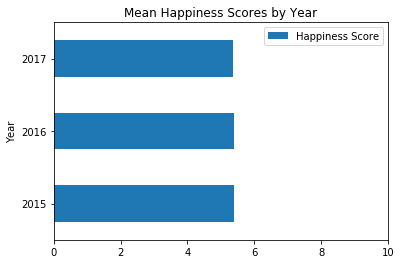

In [9]:
# Rename the Happiness.Score column to Happiness Score
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
# combine the data from the three years into one dataframe
combined = pd.concat([happiness2015, happiness2016, happiness2017], sort=False)
# create a pivot table from the combined dataframe
pivot_table_combined = combined.pivot_table(values="Happiness Score", index="Year")
# create a bar chart of the results
pivot_table_combined.plot(kind="barh", title="Mean Happiness Scores by Year", xlim=(0,10))

In [10]:
print(pivot_table_combined)

      Happiness Score
Year                 
2015         5.375734
2016         5.382185
2017         5.354019


Based on the results above, it appears that world happiness stayed about the same from 2015 to 2017!

## Factors That Contribute To Happiness

We can continue working with the World Happiness Report and explore another aspect of it that we haven't analyzed yet - the factors that contribute happiness. 

The columns listed below contain the estimated extent to which each particular factor contributes to the happiness score for the dataset:

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

Let's work with the data (starting with just the 2015 report) to see which of the factors above contribute the most to the happiness score?

In [11]:
# Let's start by renaming some of the columns in happiness2015
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015 = happiness2015.rename(mapping, axis=1)

We note that the sum of the six factors and the Dystopia Residual column equals the happiness score:

In [12]:
# Print out a few rows of the colums
(happiness2015[['Happiness Score','Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].head())

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
# Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)

# Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


In [14]:
# Let's apply a function element-wise to multiple columns of the dataset and see what impact they may be having
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity'] 
factors_impact = happiness2015[factors].applymap(label)

print(factors_impact.head(10))

  Economy Family Health Freedom Trust Generosity
0    High   High    Low     Low   Low        Low
1    High   High    Low     Low   Low        Low
2    High   High    Low     Low   Low        Low
3    High   High    Low     Low   Low        Low
4    High   High    Low     Low   Low        Low
5    High   High    Low     Low   Low        Low
6    High   High    Low     Low   Low        Low
7    High   High    Low     Low   Low        Low
8    High   High    Low     Low   Low        Low
9    High   High    Low     Low   Low        Low


We can see from the results that, according to our own definition, the Economy and Family columns had a high impact on the happiness scores, while the others seem to not have such a high impact. 

Now, we can calculate the number of 'High' and 'Low' values in each column of the result above.

In [15]:
print(factors_impact.apply(pd.value_counts))

      Economy  Family  Health  Freedom  Trust  Generosity
High       66      89       2      NaN    NaN         NaN
Low        92      69     156    158.0  158.0       158.0


Let's rework this result to get a dataframe containing the percentage of 'High' and 'Low' values in each column so we can compare the impact easily.

In [16]:
# calculate the percentage of 'High' and 'Low' values in each column
def v_counts (col):
    num = col.value_counts()
    den = col.size
    return num/den

# apply the v_counts function to all of the columns
v_counts_pct = factors_impact.apply(v_counts)
print(v_counts_pct)

       Economy    Family    Health  Freedom  Trust  Generosity
High  0.417722  0.563291  0.012658      NaN    NaN         NaN
Low   0.582278  0.436709  0.987342      1.0    1.0         1.0


In [17]:
# convert each of the values in the six factor columns and the Dystopia Residual column to percentages
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
def percentages (col):
    div = col/happiness2015["Happiness Score"]
    return (div * 100)

factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


The output above shows the individual breakdown percentages but is hard to visualize or review. Let's reshape our data and used vectorized methods instead of element by element application of a function using df.apply

In [18]:
# reshape our data so that we could use vectorized operations to convert the value column into percentage

melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


Now we can create a better views with a pivot table and a pie chart

None


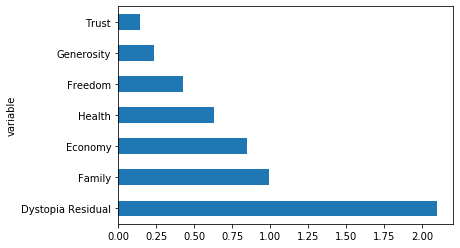

In [19]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

# Create a pivot table from the melt dataframe
pv_melt = melt.pivot_table(index="variable", values="value")

print(pv_melt.sort_values("value", ascending=False, inplace=True))

# Create a bar chart of the results
pv_melt.plot(kind="barh", y="value", legend=False)

If we disregard Dystopia Residual, Economy and Family are two prominent factors that, on average, contribute the most to the happiness score.

In [41]:
# Let's "un-melt" the data, and transform rows into columns
unmelt = melt.pivot(index="Country",columns="variable", values="value")
unmelt.head(25)

variable,Dystopia Residual,Economy,Family,Freedom,Generosity,Health,Trust
Country,,,,,,,
Afghanistan,1.95210,0.31982,0.30285,0.23414,0.36510,0.30335,0.09719
Albania,1.89894,0.87867,0.80434,0.35733,0.14272,0.81325,0.06413
Algeria,2.43209,0.93929,1.07772,0.28579,0.07822,0.61766,0.17383
Angola,1.94939,0.75778,0.86040,0.10384,0.12344,0.16683,0.07122
Argentina,2.83600,1.05351,1.24823,0.44974,0.11451,0.78723,0.08484
Armenia,1.75873,0.76821,0.77711,0.19847,0.07855,0.72990,0.03900
Australia,2.26646,1.33358,1.30923,0.65124,0.43562,0.93156,0.35637
Austria,2.53320,1.33723,1.29704,0.62433,0.33088,0.89042,0.18676
Azerbaijan,2.00073,1.02389,0.93793,0.37030,0.07799,0.64045,0.16065


## Combining current dataset with more data
Let's continue working with the 2015 World Happiness Report and add additional economic data from the World Bank. let's read the data sets into pandas and combine them.

In [43]:
# read the data sets into pandas and combine them
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged = happiness2015.merge(world_dev, how="left", left_on="Country", right_on="ShortName")
merged.rename(mapper=col_renaming, inplace=True, axis="columns")
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


Let's work with the CurrencyUnit column and extract the unit of currency without the leading nationality.

In [44]:
merged['Currency Vectorized']=(merged["CurrencyUnit"].str.split()).str.get(-1)
merged["Currency Vectorized"].head

<bound method NDFrame.head of 0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       NaN
156     franc
157     franc
Name: Currency Vectorized, Length: 158, dtype: object>

Let's see how many use dollars, francs, pesos, etc.

In [48]:
merged["Currency Vectorized"].value_counts().head()

Euro      20
franc     16
dollar    12
dinar      8
peso       7
Name: Currency Vectorized, dtype: int64

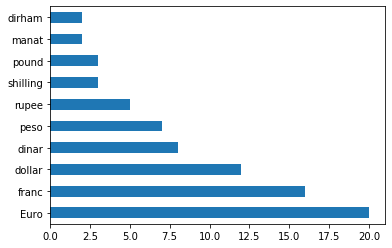

In [49]:
# Create a bar chart of the results for top 10 currency names
merged["Currency Vectorized"].value_counts().head(10).plot(kind="barh", y="value", legend=False)

The Rupee seems to be a currency name in five of the countries in the list. India and Pakistan are known to use the Indian Rupee and Pakistani Rupee respectively. What other countries are using this currency and what is their happiness rank?

In [54]:
bool_rupee = merged["Currency Vectorized"] == "rupee"
print(merged.loc[bool_rupee,["Country", "Happiness Rank", "SpecialNotes"]])

       Country  Happiness Rank  \
70   Mauritius              71   
80    Pakistan              81   
116      India             117   
120      Nepal             121   
131  Sri Lanka             132   

                                          SpecialNotes  
70                                                 NaN  
80   Fiscal year end: June 30; reporting period for...  
116  Fiscal year end: March 31; reporting period fo...  
120  Fiscal year end: July 14; reporting period for...  
131                                                NaN  


France and Belgium used to use the franc but surely they now use the Euro. How then are there 16 countries using currencies named "franc" and where do they rank in terms of Happiness Rank?

In [65]:
bool_franc = merged["Currency Vectorized"] == "franc"
print(merged.loc[bool_franc,["Country", "Happiness Rank", "Region_x"]])

                      Country  Happiness Rank            Region_x
0                 Switzerland               1      Western Europe
125                  Djibouti             126  Sub-Saharan Africa
132                  Cameroon             133  Sub-Saharan Africa
137                      Mali             138  Sub-Saharan Africa
139                   Comoros             140  Sub-Saharan Africa
141                   Senegal             142  Sub-Saharan Africa
142                     Gabon             143  Sub-Saharan Africa
143                     Niger             144  Sub-Saharan Africa
147  Central African Republic             148  Sub-Saharan Africa
148                      Chad             149  Sub-Saharan Africa
149                    Guinea             150  Sub-Saharan Africa
151              Burkina Faso             152  Sub-Saharan Africa
153                    Rwanda             154  Sub-Saharan Africa
154                     Benin             155  Sub-Saharan Africa
156       

Switzerland seems to be the only country that is doing well (really well as it's #1 in this report). The other countries are all from Sub-Saharan Africa, and presumably adopted the name "franc" as their currency as they were former colonies of Belgium or France.

Lastly, let's look at the almighty dollar!

In [66]:
bool_dollar = merged["Currency Vectorized"] == "dollar"
print(merged.loc[bool_dollar,["Country", "Happiness Rank"]])

                 Country  Happiness Rank
4                 Canada               5
8            New Zealand               9
9              Australia              10
14         United States              15
23             Singapore              24
39              Suriname              40
40   Trinidad and Tobago              41
41           El Salvador              42
47               Ecuador              48
64               Jamaica              65
114             Zimbabwe             115
115              Liberia             116


Next, we'll group the data by the IncomeGroup column and plot the results. First, however, we would like to clean the values in the IncomeGroup column

0    High income: OECD
1    High income: OECD
2    High income: OECD
3    High income: OECD
4    High income: OECD
Name: IncomeGroup, dtype: object
0      HIGH OECD
1      HIGH OECD
2      HIGH OECD
3      HIGH OECD
4      HIGH OECD
         ...    
153         LOW 
154         LOW 
155          NaN
156         LOW 
157         LOW 
Name: IncomeGroup, Length: 158, dtype: object


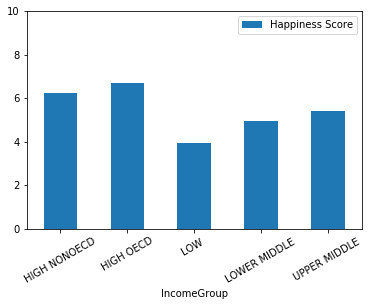

In [67]:
# clean the IncomeGroup column
cleaned_incomegroup = merged["IncomeGroup"].str.replace(" income", "")
cleaned_incomegroup = cleaned_incomegroup.str.replace(":", "")
cleaned_incomegroup = cleaned_incomegroup.str.upper()
merged["IncomeGroup"] = cleaned_incomegroup
# Get pivot table with the mean of each income group in the IncomeGroup column
pv_incomes = merged.pivot_table(index="IncomeGroup", values="Happiness Score")
# Bar plot and rotate the label by 30 degrees
pv_incomes.plot(kind="bar", rot=30, ylim=(0,10))